# **Python-Project WS2021**

<div class="alert alert-success">
<b>Overview:</b><br>
    The project in Data Engineering #2 - Python counts 60% of your final python mark (the submitted homework exercises
count the remaining 40%). <br>

The project consists of the following parts worth 100 points:
<ul>
    <li><b>E1 - Data download, data loading, and data wrangling as required and useful</b> (10 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(35 points)</li>
    <li><b>E3 - Interpret your results and explain your gained insights </b>(35 points)</li>
    <li><b>E4 - Personal reflecion on R and Python in the context of data engineering </b>(10 points)</li>
    <li><b>Follow the project guidelines below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Project guidelines:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook, your data, and a pdf rendering of your notebook.</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>All results must be interpreted.</li>
        <li>The structure of your notebook must be a self-explanatory report with an overarching storyline, i. e., a finished data engineering analysis you could show to your manager, to customers or collegues.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol></br>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

<div class="alert alert-success">
<b>Data:</b><br>
The goal of this course is a deeper understanding of data engineering methods using R and Python in a comparative manner. Hence, you will use the <b>same dataset you have selected for your R project</b> for the Python project. For further details regarding your selected dataset refer to the R project description in the R Moodle course.
</div>

<div class="alert alert-success">
<b>E1 - Data download, data loading, and data wrangling as required and useful </b>(10 points)<br>
</div>

In [79]:
# E1:
import pandas as pd
import numpy as np







In [80]:
df = pd.read_excel('fdt.xlsx')




In [81]:
df.fillna('Unknown/ Not Any', inplace=True)

<div class="alert alert-success">
<b>E2 - Exploratory data analysis (EDA) </b>(35 points):<br>
    Use your loaded dataset and perform comprehensive data understanding and <b>exploratory analysis</b> (numerical, visual, statistical). This includes at least but is not limited to:
     <ul>
    <li>A comprehensive textual description of meaning for relevant fields in the dataset</li>
    <li>Checks for data quality, e. g., completeness/missing data, plausibility, outliers
    <li>Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.</li>
    <li>Handling any identified problems with the data</li>
    <li>If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the allowing steps of your analysis with appropriate data granularity and form ("tidy data")</li>
    </ul>
    Explain all steps taken and your thinking why you deem them necessary.
</div>

In [82]:
# E2:
missing_data = df.isnull().sum()
missing_data








unternehmensverbund       0
foerderungsnehmer         0
sendernameDruckschrift    0
projekttitel              0
foerderungsart            0
kategorie                 0
subkategorie              0
foerderbetrag             0
jahr                      0
einreichtermin            0
dtype: int64

In [83]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [84]:
df.describe()

,foerderbetrag,jahr
count,1.950000e+02,195.0
mean,2.715624e+05,2022.0
std,2.865718e+05,0.0
min,7.600000e+03,2022.0
25%,8.757850e+04,2022.0
50%,1.610500e+05,2022.0
75%,3.450310e+05,2022.0
max,1.449916e+06,2022.0


In [85]:
df.groupby(['jahr','einreichtermin']).size()

jahr  einreichtermin   
2022  1. Einreichtermin    195
dtype: int64

In [86]:
#the columns jahr and einreichtermin are the same for every entry, so they can be dropped
df = df.drop("jahr", axis=1)
df = df.drop("einreichtermin", axis=1)


In [87]:
df.dtypes

unternehmensverbund       object
foerderungsnehmer         object
sendernameDruckschrift    object
projekttitel              object
foerderungsart            object
kategorie                 object
subkategorie              object
foerderbetrag              int64
dtype: object

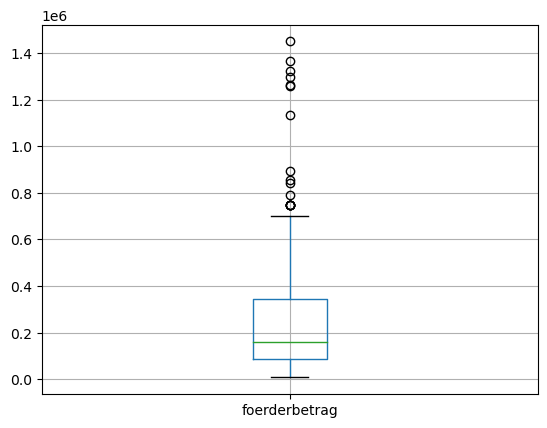

In [88]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

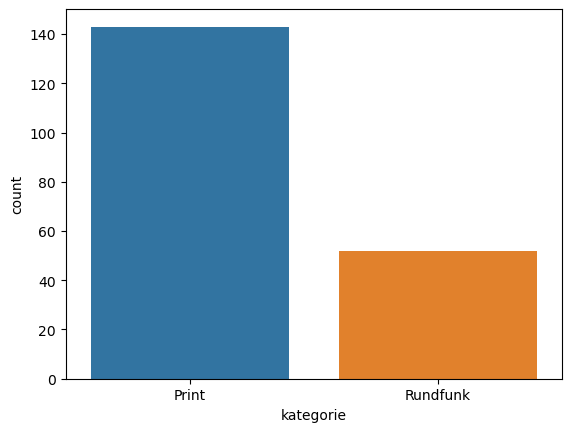

In [89]:
import seaborn as sns
sns.countplot(x = df['kategorie'])
plt.show()


In [90]:
#The majority of the Publications have appeared in Print

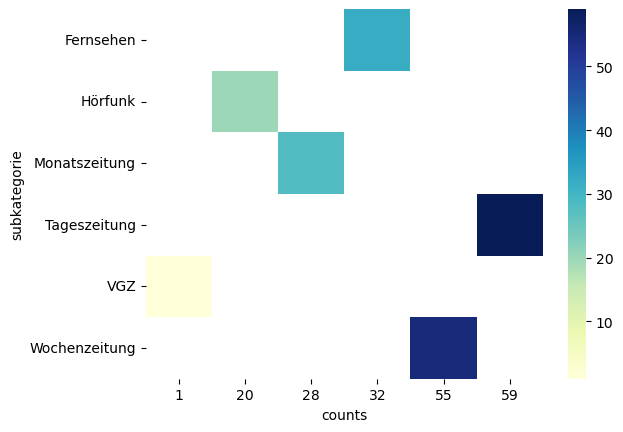

In [91]:
df_count = df.groupby(['subkategorie']).size().reset_index(name='counts')
pivot_table = df_count.pivot(index='subkategorie', columns='counts', values='counts')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.show()


In [92]:
#The predominant subcategory of  Publications are daily publications in print, followed by weekly publications also in print. 
#The third most popular subcategory is the television.

In [93]:
df_count = df.groupby(['foerderungsnehmer']).size()
df_count

foerderungsnehmer
A.Digital Errichtungs- und Beteiligungs GmbH    1
AHVV Verlags GmbH                               6
ANTENNE VORARLBERG GmbH                         2
ATV Privat TV GmbH & Co KG                      2
Bezirksblätter Burgenland Verlag GmbH           1
                                               ..
target group publishing gmbh                    1
web eXXpress Medien Holding GmbH                4
Ärzteverlag GmbH                                1
Österreichischer Kommunal-Verlag GmbH           1
Österreichischer Wirtschaftsverlag GmbH         2
Length: 82, dtype: int64

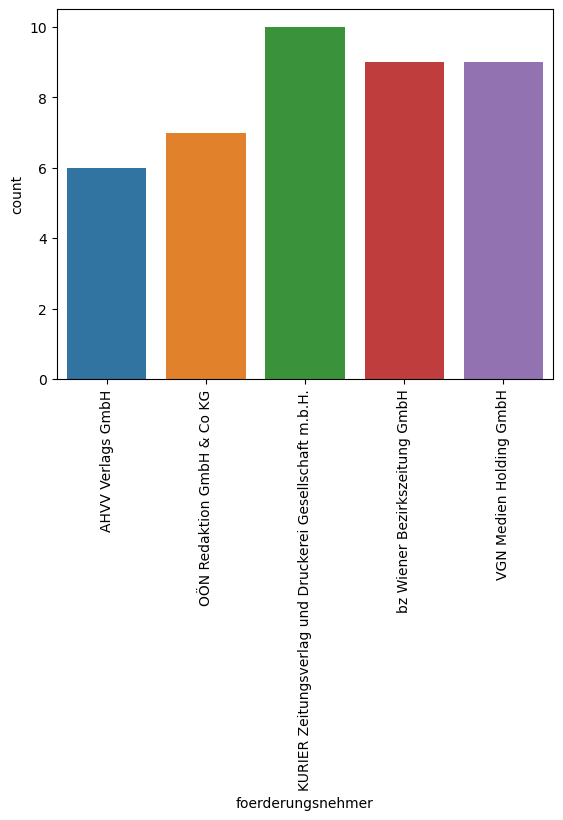

In [94]:
top_5 = df['foerderungsnehmer'].value_counts().nlargest(5)
df_top_5 = df[df['foerderungsnehmer'].isin(top_5.index)]
sns.countplot(x="foerderungsnehmer", data=df_top_5)
plt.xticks(rotation=90)
plt.show()

In [95]:
#The most popular Foerderungsnehmer is "KURIER Zeitungsvertrag Druckerei Gesellschaft m.b.H"

In [96]:
df5_kat = df_top_5.groupby(['kategorie']).size()
df5_kat

kategorie
Print    41
dtype: int64

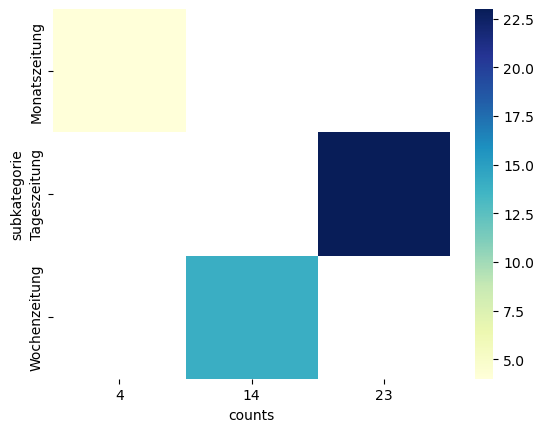

In [97]:
df5_kat = df_top_5.groupby(['subkategorie']).size().reset_index(name='counts')
pivot_table = df5_kat.pivot(index='subkategorie', columns='counts', values='counts')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.show()

In [98]:
#The top 5 Foerderungsnehmer produce only Printed Broadcasts. The most popular subcategory among them is the daily print.

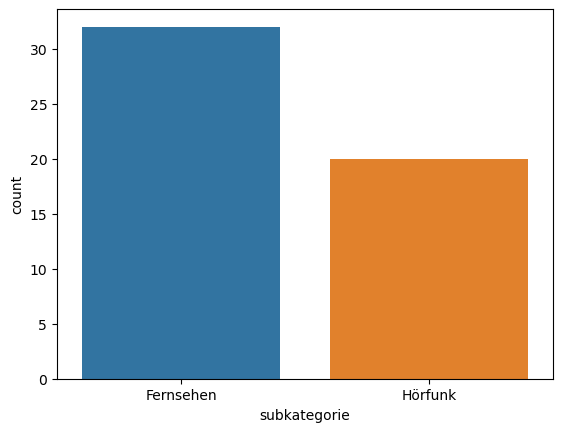

In [99]:
df_rundfunk = df.loc[df['kategorie'] == 'Rundfunk']
sns.countplot(x='subkategorie', data=df_rundfunk)
plt.show()

In [100]:
#Among tha category 'Rundfunk', the TV is significantly more represented.

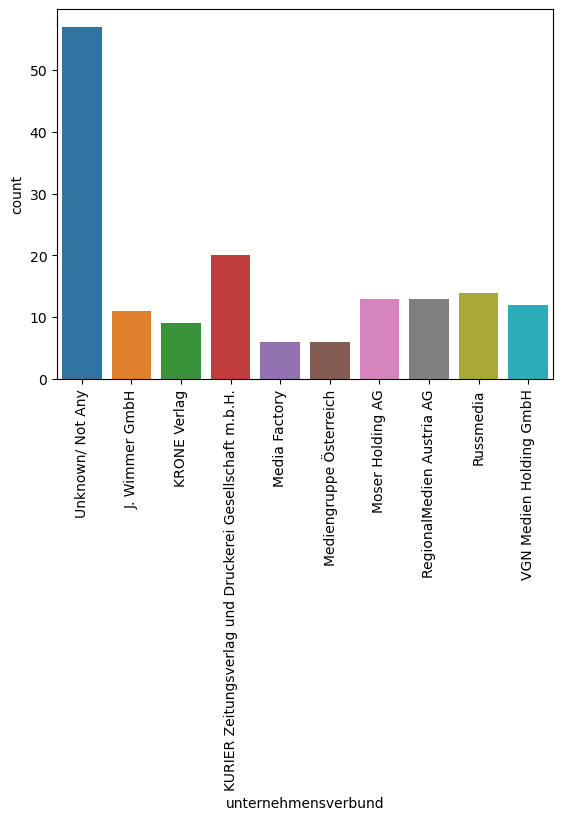

In [101]:
top_5 = df['unternehmensverbund'].value_counts().nlargest(10)
df_top_5 = df[df['unternehmensverbund'].isin(top_5.index)]
sns.countplot(x="unternehmensverbund", data=df_top_5)
plt.xticks(rotation=90)
plt.show()

In [102]:
#The most Sendungen are not owned or funded by any Unternehmensverbund. Otherwise, the major company group is Kurier.

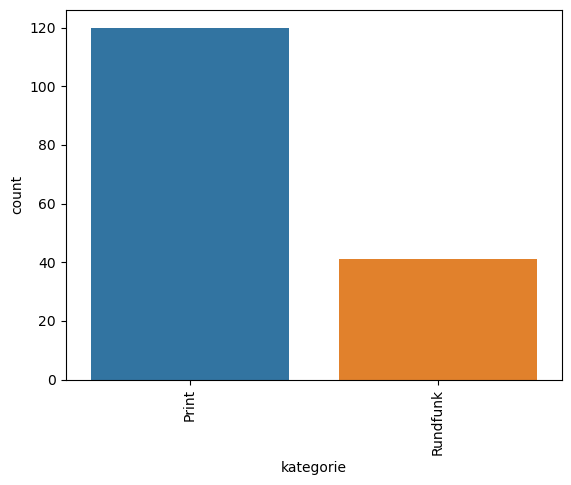

In [103]:
sns.countplot(x="kategorie", data=df_top_5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#The major groups invest more in print.

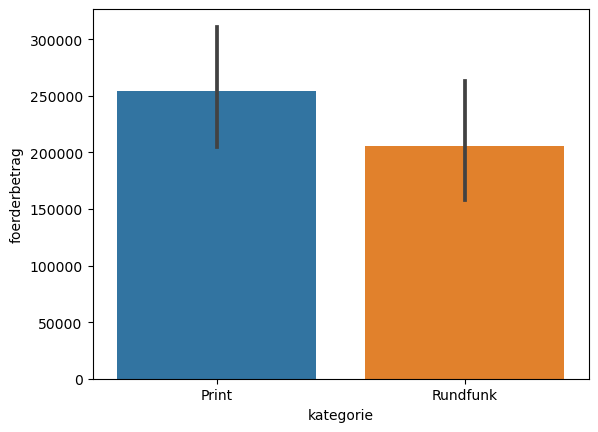

In [106]:
df_plot = df[['kategorie', 'foerderbetrag']]
sns.barplot(x='kategorie', y='foerderbetrag', data=df_plot)
plt.show()

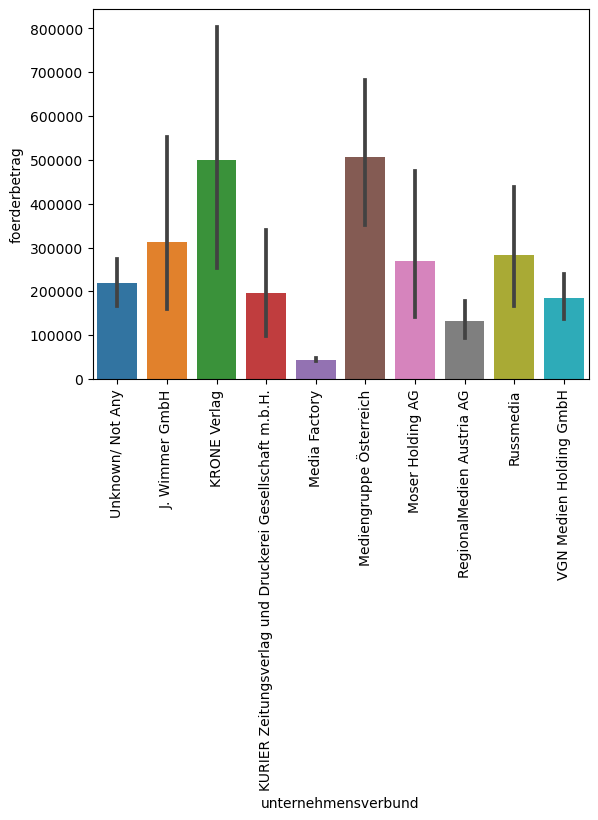

In [108]:
df_plot = df_top_5[['unternehmensverbund', 'foerderbetrag']]
sns.barplot(x='unternehmensverbund', y='foerderbetrag', data=df_plot)
plt.xticks(rotation=90)
plt.show()

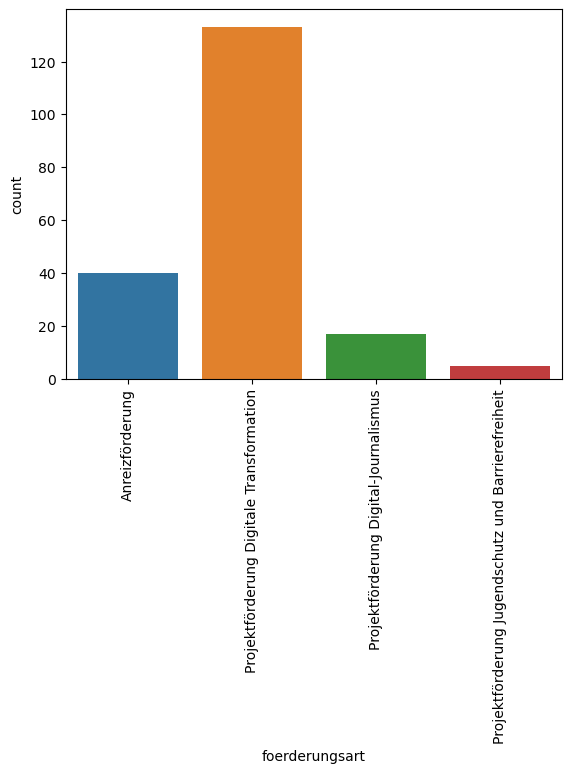

In [113]:
sns.countplot(x='foerderungsart', data=df)
plt.xticks(rotation=90)
plt.show()

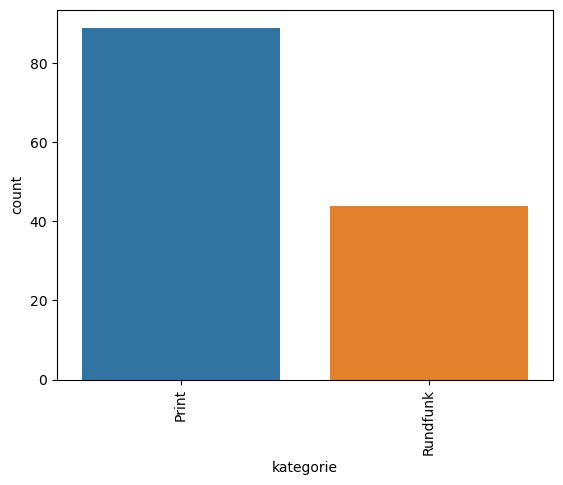

In [115]:
top_f = df['foerderungsart'].value_counts().nlargest(1)
df_top_f = df[df['foerderungsart'].isin(top_f.index)]
sns.countplot(x="kategorie", data=df_top_f)
plt.xticks(rotation=90)
plt.show()

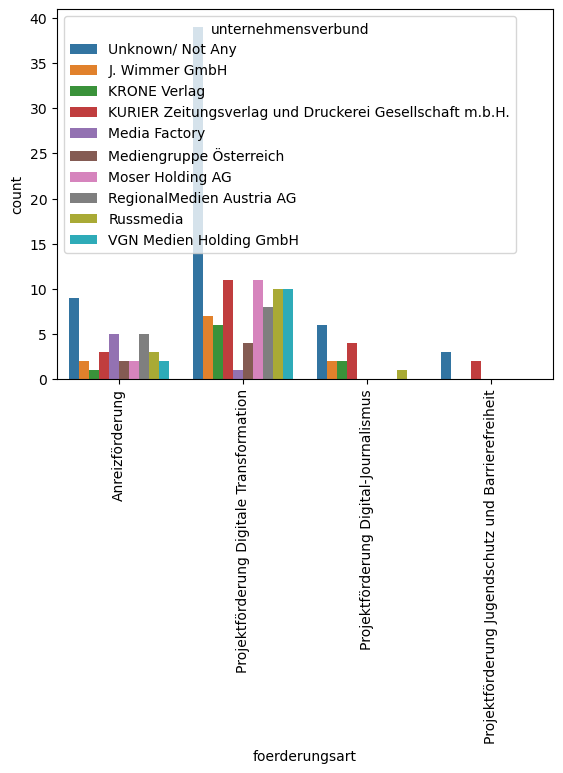

In [122]:
df_plot = df_top_5[['unternehmensverbund', 'foerderungsart']]
sns.countplot(x='foerderungsart', hue='unternehmensverbund', data=df_plot)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-success">
<b>E3 - Interpret your results and explain your gained insights </b> (35 points):</b><br>
    For this, formulate <b>at least 5 non-trivial hypotheses</b> and answer them in your interpretations using what you learned from your EDA. Think of real-life use cases/consequences of your results (textual description).</b></br>
    For each hypothesis (state it explicitly as comment!) explain all executed steps, your thinking behind them, and identify possible limitations as well as possible future points of extension for your analysis.
</div>

In [3]:
# E3 - hypothesis 1: "The Print Medium is being funded more than any other."
# Overall there are twice as many funding projects taken by print companies than Rundfunk. 
# The 5 companies that have acquired the most Funding produce only print. This indicates that there is 
# great demand for development in this departments, as it had likely beome rather old fashioned. 
# The reason behind it could be the rise of social media as a a platform for spreading all kinds of information.
# As the data provided does not specify sales and/or number of viewers/listeners, it is hard to pinpoint the exact success of 
# of each product after the completion of the projects that have been funded. 

In [4]:
# E3 - hypothesis 2: "The is more popular amond funders than the relatively old fashioned radio."
# There are almost twice as many Products for TV as there are for radio that have been funded in the year 2022. 
# The radio has significantly declined in popularity over the last decades, and nowadays people rarely have one
# but do posses a TV, which increases the demand for TV-Sendungen.
# Still, the radio is especially popular among older people and even younger once, especially while driving, so it will not
# go away too soon, which is possibly why they are not reuqesting more funds for digitalization and development.
# As the data does not provided any information about the consumers, no viable hypotheses can be made about whether or not 
# the demand for radio will decrease in the future without being moved in the online world.

In [5]:
# E3 - hypothesis 3: "The market for print is more open to digitalisation than the market for Rundfunk."
# There are more Products in the print category on the market and the major companies invest more in Print. 
# This suggests a growing need of the Print companies to advance in order to keep up with modern life. The sales of 
# the print media have been decreasing in the last decade, but due to the effort in digitalization, they have recovered some of
# their relevance. 
# As the data provided does not specify sales and/or number of viewers/listeners, it is hard to pinpoint the exact success of 
# of these projects for digitalization. 
# This can only be approximated by considering that the market functions on the bases of supply and demand, 
# which would mean 'more supply = more demand'.

In [6]:
# E3 - hypothesis 4: "The most funding comes 'Projektförderung Digitale Transformation'."
# The majour company groups are investing into digital transformation, because, as their main product is print,
# they will not survive in a world that is increasingly more active online. Many Print Publication companies have developped
# applications and websites in order to better promote their Products. 

In [7]:
# E3 - hypothesis 5: "The group company that invests the most in Jugendschutz und Barrierfreiheit is the group with the most 
# Projects overall."
# Apart from the independent companies, Kurier is the only group that received the Förderungsart 
# "Projektförderung Jugendschutz und Barrierefreiheit". Kurier is also the major group with biggest number of publications.
# Being the only major group that promotes themes of diversity suggests that the group is largely concerned about the market's
# present concerns and the need for representation in media. 

Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-success">
<b>E4 - Personal reflecion on R and Python in the context of data engineering </b>(10 points):</b><br>
In the course of this lecture series you have used both R and Python for similar problems in data engineering. Now it's time to reflect on your work of the last weeks as well as on the final project(s).
     <ol>
    <li>Where, in which context and for which problems would you use which language and why?</li>
    <li>Do you have a favourite of the two, why and for which tasks?</li>
    <li>Where do you see limitations of the two languages?</li>
    <li>Where do you see possible points of future self-study in the context of data engineering to improve your skills?</li>
    </ul>
   
</div>

In [8]:
# E4 - Personal reflecion on R and Python in the context of data engineering:


In [9]:
# ad. 1: R is best for statistical data analysis, data visualization and data exploration, while Python 
# is more suitable for general-purpose programming, data visualization, and machine learning.

In [10]:
# ad. 2: I personally prefer python because it's a general purpose programming language. It can be used for a wide variety
# of technologies, from data science and machine learning to web development. When it comes to data science, I find that it 
# creates much more detailed and clean graphics that lead to a better understanding of the data.

In [11]:
# ad. 3:For R, one limitation is its memory management, which can be an issue when working with large datasets.
# Additionally, R's performance can be slower 
# compared to other programming languages, such as Python.

In [12]:
# ad. 4: Possible points of self-study could be distributed computing, cloud computing, data modeling and machine learning.